In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [38]:
data  = pd.read_csv("/content/Weather.csv")
data = data.drop(columns=["date_time", "precipMM", "moonset", "moonrise", "sunset", "sunrise"])

In [39]:
data



,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,24,10,0,8.7,4,1,31,2,11,12,11,21,17,50,1015,11,10,320,10
1,24,10,0,8.7,4,1,31,3,12,13,12,22,11,52,1015,11,10,315,11
2,24,10,0,8.7,4,1,31,4,12,13,12,23,6,55,1015,11,10,310,11
3,24,10,0,8.7,4,1,31,5,12,13,12,23,0,57,1015,10,10,304,12
4,24,10,0,8.7,4,1,31,5,14,14,14,19,0,54,1016,11,10,302,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,15,11,0,7.1,4,1,37,6,13,13,13,21,53,61,1019,13,8,74,11
96428,15,11,0,7.1,4,1,37,6,12,13,12,22,39,61,1020,13,9,81,11
96429,15,11,0,7.1,4,1,37,6,12,13,12,23,25,62,1020,13,10,88,11
96430,15,11,0,7.1,4,1,37,6,12,13,12,21,26,63,1020,13,10,85,11


In [40]:
def classify_temperature(temp):
  if temp < 25:
    return "cold"
  else:
    return "hot"

# Apply the function to the temperature column
data['maxtempC'] = data['maxtempC'].apply(classify_temperature)

In [41]:
data.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,cold,10,0,8.7,4,1,31,2,11,12,11,21,17,50,1015,11,10,320,10
1,cold,10,0,8.7,4,1,31,3,12,13,12,22,11,52,1015,11,10,315,11
2,cold,10,0,8.7,4,1,31,4,12,13,12,23,6,55,1015,11,10,310,11
3,cold,10,0,8.7,4,1,31,5,12,13,12,23,0,57,1015,10,10,304,12
4,cold,10,0,8.7,4,1,31,5,14,14,14,19,0,54,1016,11,10,302,11


In [42]:
one_hot = pd.get_dummies(data['maxtempC'])

In [43]:
data.head(4)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,cold,10,0,8.7,4,1,31,2,11,12,11,21,17,50,1015,11,10,320,10
1,cold,10,0,8.7,4,1,31,3,12,13,12,22,11,52,1015,11,10,315,11
2,cold,10,0,8.7,4,1,31,4,12,13,12,23,6,55,1015,11,10,310,11
3,cold,10,0,8.7,4,1,31,5,12,13,12,23,0,57,1015,10,10,304,12


In [44]:
data.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,cold,10,0,8.7,4,1,31,2,11,12,11,21,17,50,1015,11,10,320,10
1,cold,10,0,8.7,4,1,31,3,12,13,12,22,11,52,1015,11,10,315,11
2,cold,10,0,8.7,4,1,31,4,12,13,12,23,6,55,1015,11,10,310,11
3,cold,10,0,8.7,4,1,31,5,12,13,12,23,0,57,1015,10,10,304,12
4,cold,10,0,8.7,4,1,31,5,14,14,14,19,0,54,1016,11,10,302,11


In [45]:
data = data.drop("maxtempC",axis=1)


In [46]:
data = pd.concat([data, one_hot], axis=1)

In [47]:
data.head(5)

,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,cold,hot
0,10,0,8.7,4,1,31,2,11,12,11,21,17,50,1015,11,10,320,10,1,0
1,10,0,8.7,4,1,31,3,12,13,12,22,11,52,1015,11,10,315,11,1,0
2,10,0,8.7,4,1,31,4,12,13,12,23,6,55,1015,11,10,310,11,1,0
3,10,0,8.7,4,1,31,5,12,13,12,23,0,57,1015,10,10,304,12,1,0
4,10,0,8.7,4,1,31,5,14,14,14,19,0,54,1016,11,10,302,11,1,0


In [56]:
X = data.drop(one_hot, axis=1)
y = one_hot.idxmax(axis=1)
X = abs(X)



In [57]:
from sklearn.feature_selection import SelectKBest, chi2

selec = SelectKBest(chi2, k=10)
selec.fit(X,y)
top_10 = selec.get_support(indices = True)
X_t10 = X.iloc[:, top_10] 
print(X_t10.columns)

Index(['mintempC', 'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'cloudcover', 'humidity', 'tempC', 'winddirDegree'],
      dtype='object')


In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into training and test sets, stratifying the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

# Print the evaluation report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        cold       0.53      0.98      0.68      2397
         hot       1.00      0.88      0.93     16890

    accuracy                           0.89     19287
   macro avg       0.76      0.93      0.81     19287
weighted avg       0.94      0.89      0.90     19287



In [62]:
y_pred


array(['hot', 'cold', 'hot', ..., 'cold', 'hot', 'hot'], dtype='<U4')

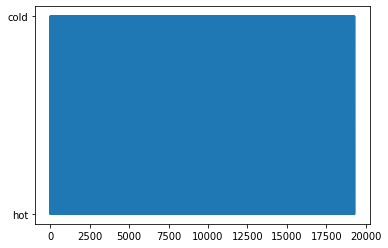

In [63]:
plt.plot(y_pred)
plt.show()

In [64]:
from sklearn.metrics import accuracy_score

# Compute the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)


0.8875926790065848


In [ ]:
df_resampled = pd.DataFrame(data)

In [ ]:
df_resampled.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
96422,15.0,11.0,0.0,7.1,4.0,3.0,37.0,6.0,14.0,14.0,14.0,14.0,62.0,59.0,0.1,1020.0,14.0,6.0,68.0,9.0
96423,15.0,11.0,0.0,7.1,4.0,3.0,37.0,7.0,13.0,14.0,13.0,14.0,63.0,62.0,0.1,1019.0,14.0,5.0,57.0,8.0
96424,15.0,11.0,0.0,7.1,4.0,3.0,37.0,6.0,13.0,14.0,13.0,16.0,65.0,61.0,0.0,1019.0,14.0,6.0,60.0,9.0
96425,15.0,11.0,0.0,7.1,4.0,4.0,37.0,6.0,13.0,14.0,13.0,18.0,66.0,61.0,0.0,1019.0,14.0,6.0,63.0,10.0
96426,15.0,11.0,0.0,7.1,4.0,4.0,37.0,6.0,13.0,14.0,13.0,21.0,68.0,60.0,0.0,1019.0,14.0,7.0,67.0,11.0
96427,15.0,11.0,0.0,7.1,4.0,1.0,37.0,6.0,13.0,13.0,13.0,21.0,53.0,61.0,0.0,1019.0,13.0,8.0,74.0,11.0
96428,15.0,11.0,0.0,7.1,4.0,1.0,37.0,6.0,12.0,13.0,12.0,22.0,39.0,61.0,0.0,1020.0,13.0,9.0,81.0,11.0
96429,15.0,11.0,0.0,7.1,4.0,1.0,37.0,6.0,12.0,13.0,12.0,23.0,25.0,62.0,0.0,1020.0,13.0,10.0,88.0,11.0
96430,15.0,11.0,0.0,7.1,4.0,1.0,37.0,6.0,12.0,13.0,12.0,21.0,26.0,63.0,0.0,1020.0,13.0,10.0,85.0,11.0
96431,15.0,11.0,0.0,7.1,4.0,1.0,37.0,6.0,12.0,12.0,12.0,20.0,27.0,64.0,0.0,1020.0,12.0,10.0,83.0,10.0
